Аналитическая часть

$$
w = (X^\top X)^{-1} X^\top y
$$


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

X = df["MedInc"].values
y = df["MedHouseVal"].values


In [12]:
X_mat = np.vstack([X, np.ones(len(X))]).T

w = np.linalg.inv(X_mat.T @ X_mat) @ (X_mat.T @ y)
k, b = w[0], w[1]

print("Аналитическая модель:")
print("k =", k)
print("b =", b)


Аналитическая модель:
k = 0.417938492018961
b = 0.4508557670326854


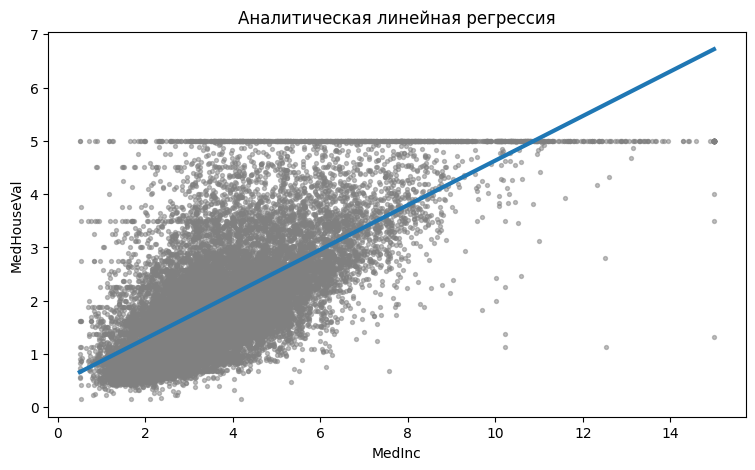

In [13]:
idx = np.argsort(X)
X_sorted = X[idx]
y_sorted_pred = k * X_sorted + b
plt.figure(figsize=(9, 5))
plt.scatter(X, y, s=8, c="gray", alpha=0.5)
plt.plot(X_sorted, y_sorted_pred, linewidth=3)
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.title("Аналитическая линейная регрессия")
plt.show()


Практическая часть

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_full = df.drop("MedHouseVal", axis=1)
y_full = df["MedHouseVal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_full, test_size=0.2, random_state=42
)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(max_depth=8, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42)
}

trained = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained[name] = model


In [16]:
scores = {}

y_pred_analytic = k * X + b
analytic_mse = mean_squared_error(y, y_pred_analytic)
analytic_r2 = r2_score(y, y_pred_analytic)
scores["AnalyticLinear"] = (analytic_mse, analytic_r2)

for name, model in trained.items():
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    scores[name] = (mse, r2)

import pandas as pd
pd.DataFrame(scores, index=["MSE", "R2"]).T


,MSE,R2
AnalyticLinear,0.701131,0.473447
LinearRegression,0.555892,0.575788
DecisionTree,0.422045,0.677928
RandomForest,0.254011,0.806159


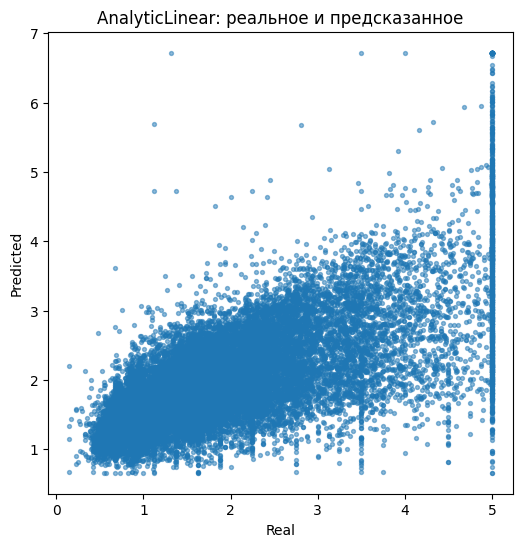

In [19]:
y_pred_analytic = k * X + b

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_analytic, s=8, alpha=0.5)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("AnalyticLinear: реальное и предсказанное")
plt.show()

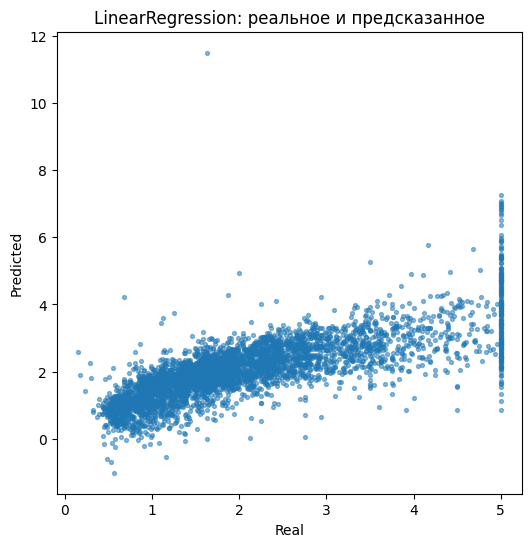

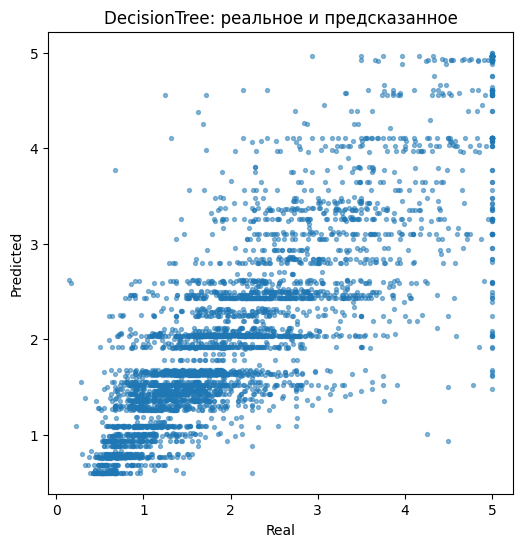

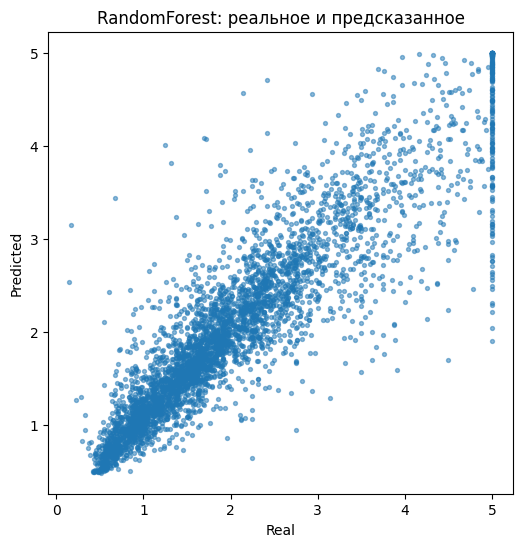

In [18]:
for name, model in trained.items():
    pred = model.predict(X_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, pred, s=8, alpha=0.5)
    plt.xlabel("Real")
    plt.ylabel("Predicted")
    plt.title(f"{name}: реальное и предсказанное")
    plt.show()
